In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('desafio_indicium_imdb.csv')
df.head()

Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444  
2   Diane Keaton      1129952   57,300,000  
3   John Fiedler       689845    4,360,000  
4  Orlando Bloom      1642758  377,845,905

In [ ]:
print("Formato do DataFrame:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

Formato do DataFrame: (999, 16)

Tipos de dados:
Unnamed: 0         int64
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [ ]:
#Verifica√ß√£o de valores faltantes da tabela
nulos_por_coluna = df.isnull()
contagem_nulos = nulos_por_coluna.sum()
print("Contagem de valores nulos por coluna:")
print(contagem_nulos)

Contagem de valores nulos por coluna:
Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
# Conta o n√∫mero de linhas que possuem pelo menos um valor faltante
linhas_com_faltantes = df.isnull().any(axis=1).sum()

print(f"N√∫mero de linhas com dados faltantes: {linhas_com_faltantes}")


N√∫mero de linhas com dados faltantes: 286


In [ ]:
#Separa a string "min" do valor
df['Runtime'] = df['Runtime'].str.replace(' min', '')
print(df['Runtime'].head())

0    175
1    152
2    202
3     96
4    201
Name: Runtime, dtype: object


In [ ]:
#Retira "," dos valores Gross, processo nescessario para transforma√ß√£o em numeros inteiros
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)


In [ ]:
# Converter as colunas para num√©rico, for√ßando erros a virarem NaN
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

print(df[['Runtime', 'Gross', 'Released_Year']].dtypes)
print(df[['Runtime', 'Gross', 'Released_Year']].head())

Runtime            int64
Gross            float64
Released_Year    float64
dtype: object
   Runtime        Gross  Released_Year
0      175  134966411.0         1972.0
1      152  534858444.0         2008.0
2      202   57300000.0         1974.0
3       96    4360000.0         1957.0
4      201  377845905.0         2003.0


In [ ]:
#Converter colunas para do tipo num√©rico(foi verificado )
#df[['Runtime', 'Gross','Released_Year']] = df[['Runtime', 'Gross','Released_Year']].astype('float64')
#print(df[['Runtime', 'Gross','Released_Year']].dtypes)
#print(df[['Runtime', 'Gross','Released_Year']].head())
#print("\nTipos de dados:")
#print(df.dtypes)

In [ ]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
colunas_numericasV1 = colunas_numericas.drop('Unnamed: 0')
print(colunas_numericasV1)

Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


In [ ]:
#Criando um db apenas com as colunas numericas
df_numerico = df[colunas_numericasV1]
print(df_numerico.head())

   Released_Year  Runtime  IMDB_Rating  Meta_score  No_of_Votes        Gross
0         1972.0      175          9.2       100.0      1620367  134966411.0
1         2008.0      152          9.0        84.0      2303232  534858444.0
2         1974.0      202          9.0        90.0      1129952   57300000.0
3         1957.0       96          9.0        96.0       689845    4360000.0
4         2003.0      201          8.9        94.0      1642758  377845905.0


In [ ]:
#Dropando valores faltantes do banco de dados numerico
bd_sem_nulos = df_numerico.dropna()

In [ ]:
#Verifica√ß√£o de valores faltantes da tabela
nulos_por_coluna = bd_sem_nulos.isnull()
contagem_nulos = nulos_por_coluna.sum()
print("Contagem de valores nulos por coluna:")
print(contagem_nulos)

Contagem de valores nulos por coluna:
Released_Year    0
Runtime          0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
dtype: int64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

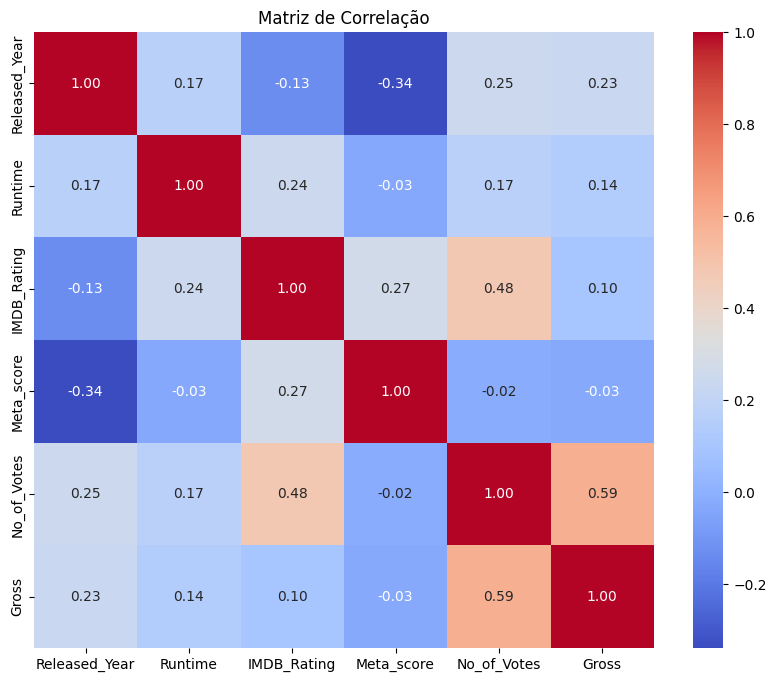

In [ ]:
#Gerando grafico de correla√ß√£o entre as variaveis numerics
correlation_matrix = df_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correla√ß√£o')
plt

An√°lise do No_of_Votes (N√∫mero de Votos)
Observa-se que o n√∫mero de votos tem uma correla√ß√£o positiva moderada com o faturamento (Gross) e com a nota do IMDb (IMDB_Rating).

Conclus√£o: Isso indica que popularidade, sucesso comercial e avalia√ß√£o do p√∫blico est√£o conectados. Filmes que arrecadam mais dinheiro tendem a ser mais vistos e, consequentemente, recebem mais votos. Da mesma forma, filmes com notas altas no IMDb geralmente s√£o mais populares e atraem um p√∫blico maior, que por sua vez gera mais votos.

A correla√ß√£o fraca, mas positiva, com o ano de lan√ßamento (Released_Year) sugere que filmes mais recentes tendem a acumular um n√∫mero maior de votos, o que pode ser explicado pela crescente populariza√ß√£o das plataformas de avalia√ß√£o online ao longo do tempo.

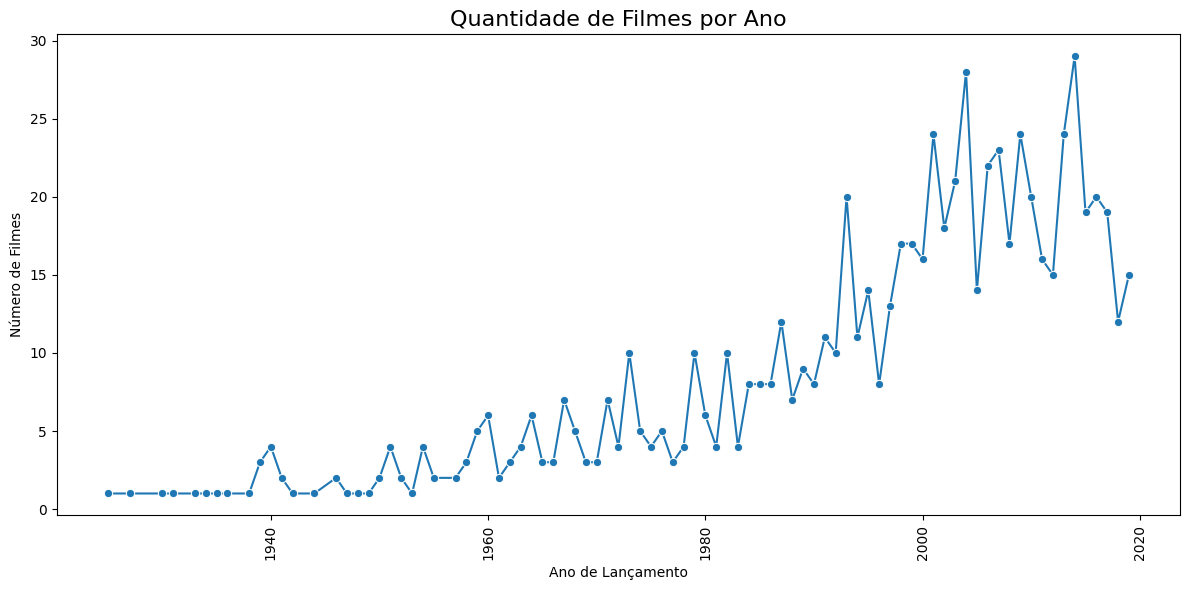

In [ ]:
df_Numerico = bd_sem_nulos

# Conta quantos filmes existem em cada ano
df_count_filmes = df_Numerico.groupby("Released_Year")["Gross"].count().reset_index()
df_count_filmes.rename(columns={"Gross": "Quantidade_Filmes"}, inplace=True)

# Plotando
plt.figure(figsize=(12,6))
sns.lineplot(data=df_count_filmes, x="Released_Year", y="Quantidade_Filmes", marker="o")

plt.title("Quantidade de Filmes por Ano", fontsize=16)
plt.xlabel("Ano de Lan√ßamento")
plt.ylabel("N√∫mero de Filmes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2483445877.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top15_por_ano = df_Numerico.groupby("Released_Year", group_keys=False).apply(


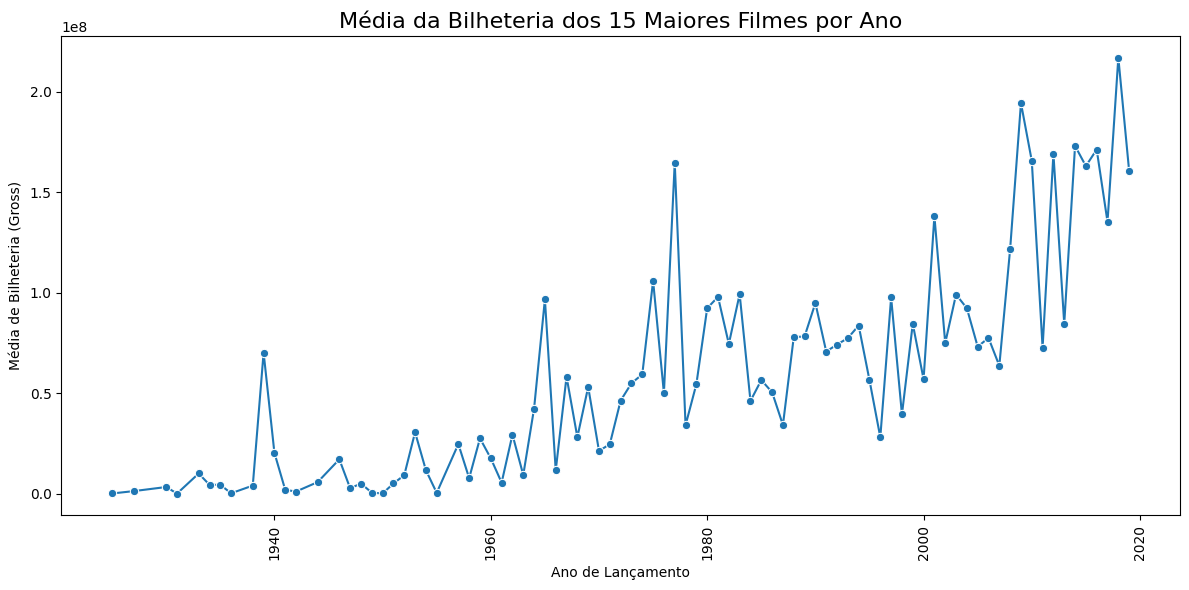

In [ ]:
df_Numerico = bd_sem_nulos
top15_por_ano = df_Numerico.groupby("Released_Year", group_keys=False).apply(
    lambda x: x.nlargest(15, "Gross")
)

# Calcula a m√©dia do Gross desses top 15 por ano
df_mean_gross = top15_por_ano.groupby("Released_Year")["Gross"].mean().reset_index()

# Plotando
plt.figure(figsize=(12,6))
sns.lineplot(data=df_mean_gross, x="Released_Year", y="Gross", marker="o")

plt.title("M√©dia da Bilheteria dos 15 Maiores Filmes por Ano", fontsize=16)
plt.xlabel("Ano de Lan√ßamento")
plt.ylabel("M√©dia de Bilheteria (Gross)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


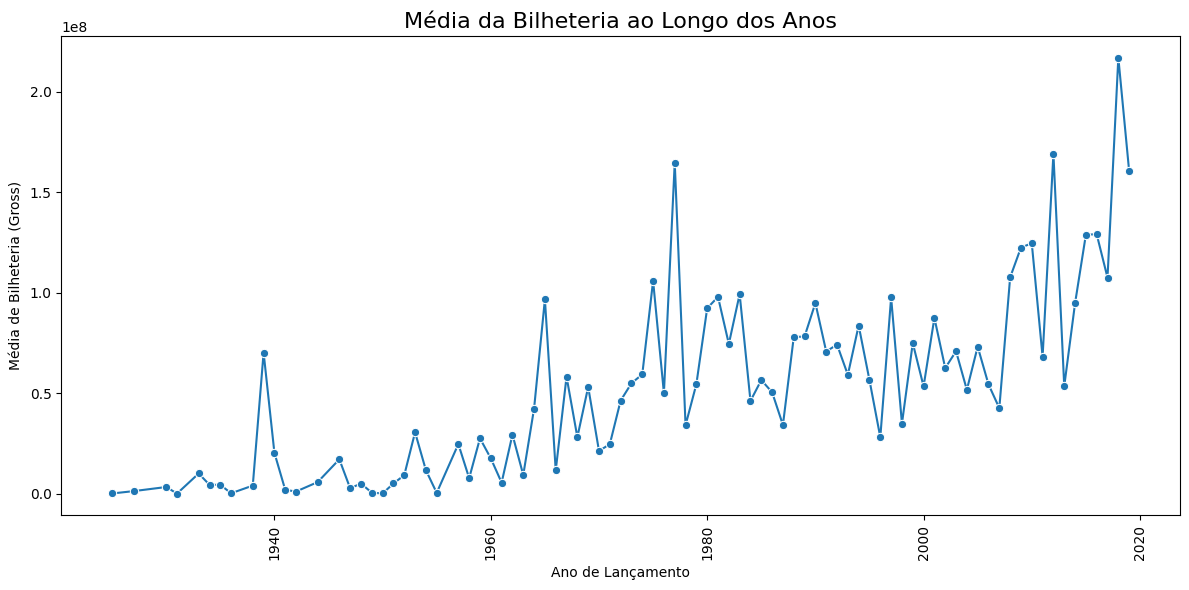

In [ ]:
df_Numerico=bd_sem_nulos
df_mean_gross = df_Numerico.groupby('Released_Year')['Gross'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=df_mean_gross, x='Released_Year', y='Gross', marker="o")

plt.title("M√©dia da Bilheteria ao Longo dos Anos", fontsize=16)
plt.xlabel("Ano de Lan√ßamento")
plt.ylabel("M√©dia de Bilheteria (Gross)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

A an√°lise do faturamento cinematogr√°fico revela uma tend√™ncia de crescimento durante a transi√ß√£o de ano. Essa evolu√ß√£o pode ser atribu√≠da a m√∫ltiplos fatores, entre os quais o desenvolvimento tecnol√≥gico se destaca. As novas tecnologias n√£o apenas simplificam e ampliam o alcance da divulga√ß√£o dos filmes, mas tamb√©m contribuem para um aumento expressivo no n√∫mero de espectadores.

In [ ]:
df = df.dropna(subset=["IMDB_Rating", "No_of_Votes", "Genre", "Certificate"])
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df = df.dropna(subset=["Released_Year"])
# Ajustar d√©cada
df["Decade"] = (df["Released_Year"] // 10) * 10
# --- NOTA PONDERADA (IMDB + votos) ---
C = df["IMDB_Rating"].mean()
m = df["No_of_Votes"].quantile(0.70)  # exige estar no top 30% de votos

def weighted_rating(x, m=m, C=C):
    v = x["No_of_Votes"]
    R = x["IMDB_Rating"]
    return (v/(v+m) * R) + (m/(v+m) * C)

df["Weighted_Score"] = df.apply(weighted_rating, axis=1)

# --- CONSIST√äNCIA DE DIRETORES ---
diretor_media = df.groupby("Director")["IMDB_Rating"].mean().to_dict()
diretor_qtd = df.groupby("Director")["IMDB_Rating"].count().to_dict()
# Criando score de consist√™ncia: m√©dia da nota * log(qtd filmes)
import numpy as np
df["Director_Score"] = df["Director"].apply(
    lambda d: diretor_media.get(d, 0) * np.log1p(diretor_qtd.get(d, 1))
)
# --- SCORE FINAL ---
# Combinei: Weighted Score, Meta_score (quando existir), e consist√™ncia do diretor
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")
df["Final_Score"] = (
    0.5 * df["Weighted_Score"] +
    0.2 * (df["Meta_score"].fillna(df["Meta_score"].mean()) / 10) +  # normaliza /10
    0.3 * df["Director_Score"]
)
# --- FUN√á√ÉO DE RECOMENDA√á√ÉO ---
def recomendar_filmes(certificate, genero, decada=None, top_n=3):
    filmes_filtrados = df[
        (df["Certificate"].str.contains(certificate, case=False, na=False)) &
        (df["Genre"].str.contains(genero, case=False, na=False))
    ]

    # Filtrar por d√©cada
    if decada:
        filmes_filtrados = filmes_filtrados[filmes_filtrados["Decade"] == decada]

    if filmes_filtrados.empty:
        print("Nenhum filme encontrado para esses filtros.")
        return

    filmes_ordenados = filmes_filtrados.sort_values(by="Final_Score", ascending=False)

    recomendados = filmes_ordenados.head(top_n)[
        ["Series_Title", "Released_Year", "Decade", "Director",
         "IMDB_Rating", "No_of_Votes", "Meta_score", "Weighted_Score",
         "Director_Score", "Final_Score", "Genre", "Certificate"]
    ]

    return recomendados

print("üîé Recomenda√ß√£o (UA, Action, anos 2000):")
recomendados = recomendar_filmes("U", "Adventure", decada=2000, top_n=3)#Para alterar as indica√ß√£o, basta alterar os parametros da fun√ß√£o.
print(recomendados)


üîé Recomenda√ß√£o (UA, Action, anos 2000):
                      Series_Title  Released_Year  Decade        Director  \
22   Sen to Chihiro no kamikakushi         2001.0  2000.0  Hayao Miyazaki   
755            Gake no ue no Ponyo         2008.0  2000.0  Hayao Miyazaki   
157           Hauru no ugoku shiro         2004.0  2000.0  Hayao Miyazaki   

     IMDB_Rating  No_of_Votes  Meta_score  Weighted_Score  Director_Score  \
22           8.6       651376        96.0        8.370464       19.924433   
755          7.7       125317        86.0        7.884997       19.924433   
157          8.2       333915        80.0        8.071131       19.924433   

     Final_Score                         Genre Certificate  
22     12.082562  Animation, Adventure, Family           U  
755    11.639829  Animation, Adventure, Comedy           U  
157    11.612896  Animation, Adventure, Family           U  


2)a)O script cruza vari√°veis relevantes para determinar quais filmes possuem maior destaque e, portanto, s√£o mais indicados. Para calcular essa indica√ß√£o foram utilizados os seguintes crit√©rios:

Weighted_Score ‚Üí combina√ß√£o da nota do IMDb com o n√∫mero de votos, garantindo equil√≠brio entre qualidade percebida e popularidade.

Director_Score ‚Üí m√©dia das avalia√ß√µes dos filmes de cada diretor, ajustada pela quantidade de obras realizadas, medindo consist√™ncia.

Meta_score ‚Üí avalia√ß√£o da cr√≠tica profissional, normalizada para ser compar√°vel √†s demais m√©tricas.

Final_Score ‚Üí pontua√ß√£o final resultante da pondera√ß√£o dos tr√™s indicadores anteriores.

Al√©m disso, o sistema permite a aplica√ß√£o de filtros opcionais, como classifica√ß√£o et√°ria, g√™nero e d√©cada, para refinar a recomenda√ß√£o e adapt√°-la ao perfil do usu√°rio

In [ ]:
def recomendar_sem_parametros(top_n=3):
    filmes_ordenados = df.sort_values(by="Final_Score", ascending=False)
    return filmes_ordenados.head(top_n)[
        ["Series_Title", "Released_Year", "Director", "IMDB_Rating",
         "No_of_Votes", "Meta_score", "Weighted_Score", "Director_Score", "Final_Score"]
    ]

# Exemplo de uso
print("üîé Top 3 filmes sem par√¢metros:")
print(recomendar_sem_parametros(3))

üîé Top 3 filmes sem par√¢metros:
               Series_Title  Released_Year          Director  IMDB_Rating  \
6          Schindler's List         1993.0  Steven Spielberg          8.9   
23      Saving Private Ryan         1998.0  Steven Spielberg          8.6   
71  Raiders of the Lost Ark         1981.0  Steven Spielberg          8.4   

    No_of_Votes  Meta_score  Weighted_Score  Director_Score  Final_Score  
6       1213505        94.0        8.684680        21.19366    12.580438  
23      1235804        91.0        8.454752        21.19366    12.405474  
71       884112        85.0        8.270935        21.19366    12.193565  


O script de recomenda√ß√£o de filmes avalia e combina tr√™s fatores principais: a nota ponderada do p√∫blico (IMDb + n√∫mero de votos), a consist√™ncia do diretor e a cr√≠tica especializada (Meta_score). Essa abordagem garante que os filmes sugeridos n√£o sejam apenas populares, mas tamb√©m de qualidade consistente e reconhecidos por cr√≠ticos profissionais. O Final_Score resultante proporciona uma recomenda√ß√£o equilibrada, considerando tanto a percep√ß√£o do p√∫blico quanto a experi√™ncia e hist√≥rico do diretor, oferecendo assim indica√ß√µes confi√°veis e relevantes para diferentes tipos de espectadores.

2)b-

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

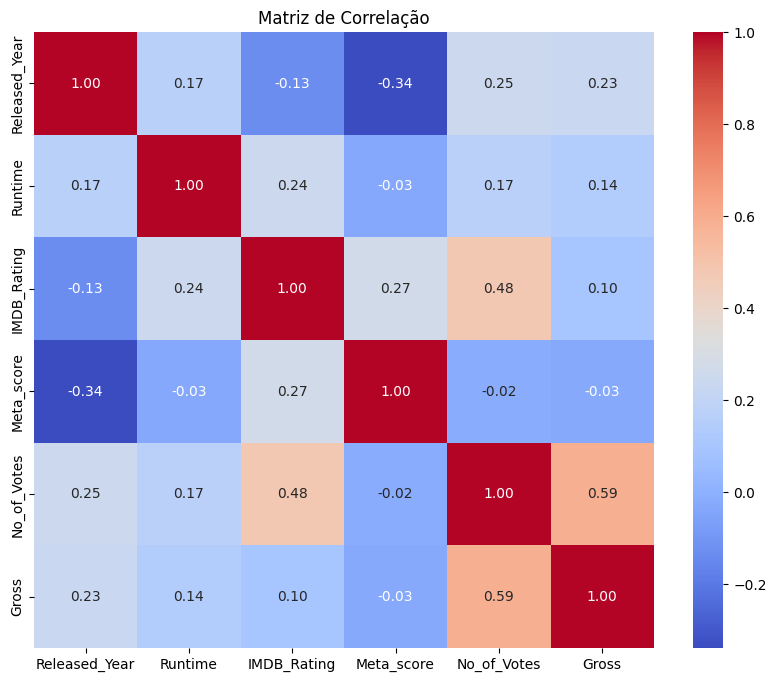

In [ ]:
#Gerando grafico de correla√ß√£o entre as variaveis numerics
correlation_matrix = df_numerico.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correla√ß√£o')
plt

<Figure size 1800x1000 with 0 Axes>

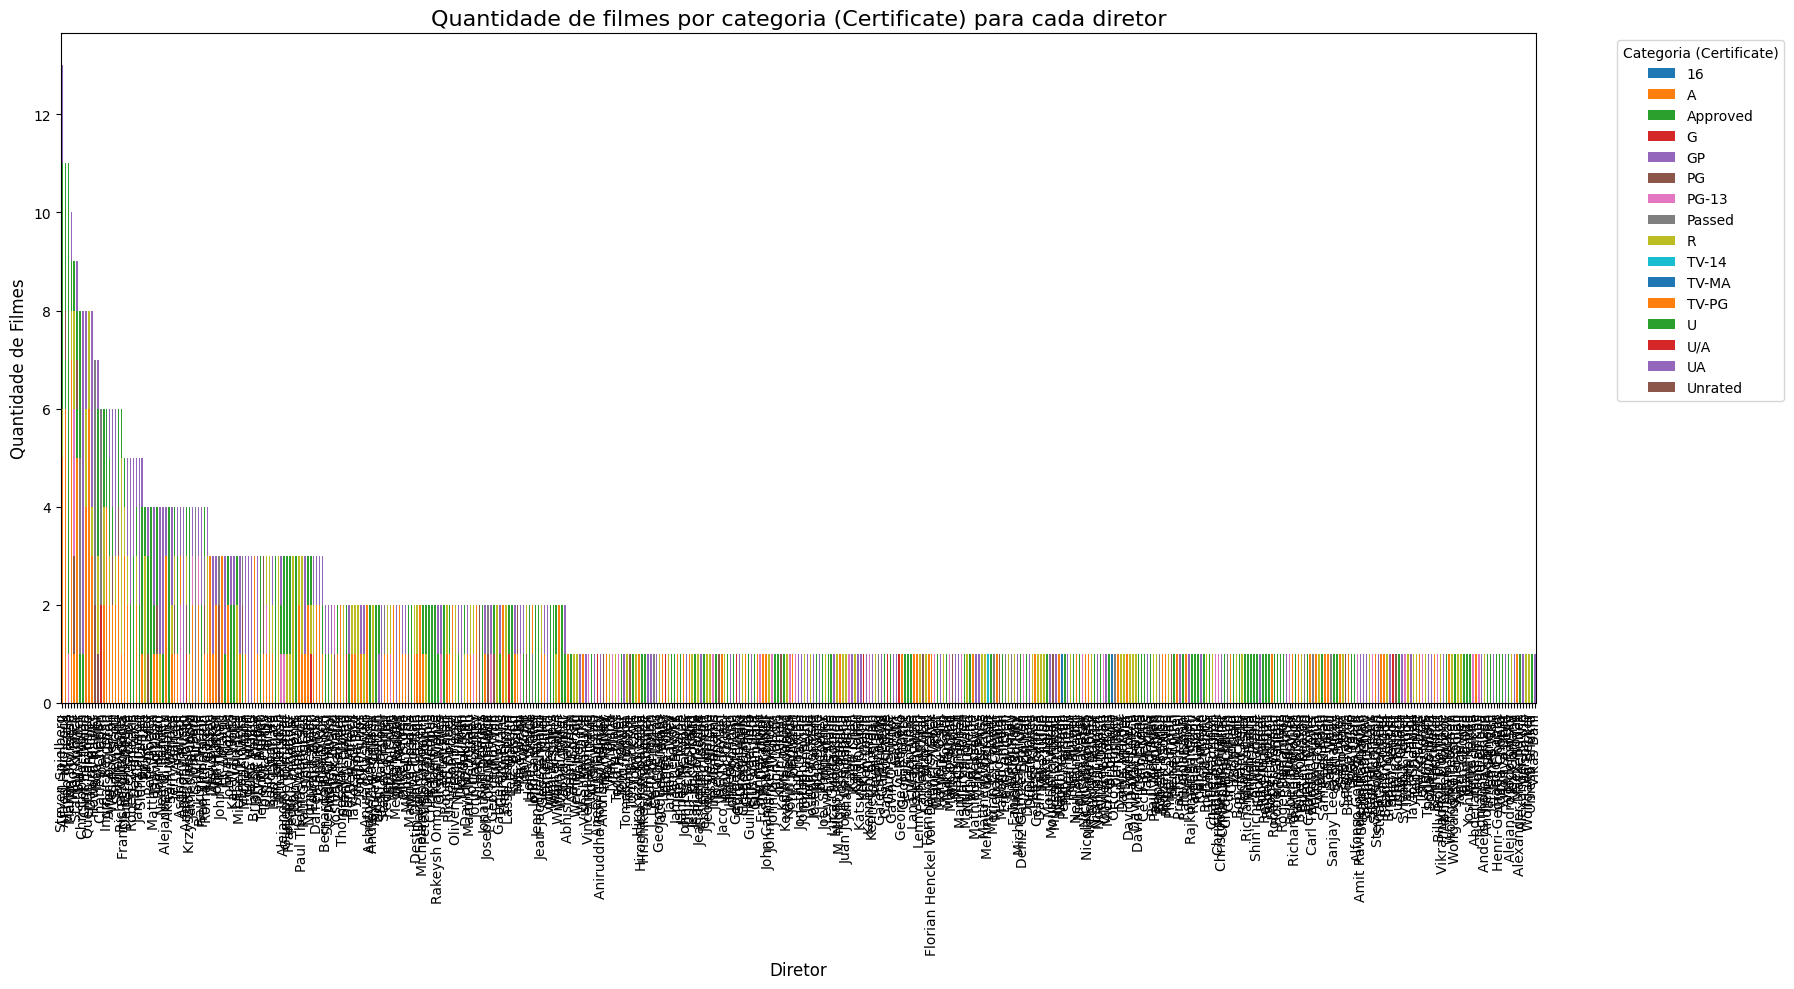

In [ ]:
# Remover linhas com dados faltantes em 'Certificate' ou 'Director'
df = df.dropna(subset=["Certificate", "Director"])

# Contar a quantidade de filmes por diretor e por categoria (Certificate)
filmes_por_diretor_categoria = df.groupby(["Director", "Certificate"]).size().reset_index(name="Quantidade")

# Criar tabela piv√¥ para facilitar visualiza√ß√£o
pivot_table = filmes_por_diretor_categoria.pivot(index="Director", columns="Certificate", values="Quantidade").fillna(0)

# Ordenar os diretores pelo total de filmes (soma das categorias)
pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

# Plotar gr√°fico de barras empilhadas para TODOS os diretores
plt.figure(figsize=(18, 10))
pivot_table.plot(kind="bar", stacked=True, figsize=(18, 10))

plt.title("Quantidade de filmes por categoria (Certificate) para cada diretor", fontsize=16)
plt.xlabel("Diretor", fontsize=12)
plt.ylabel("Quantidade de Filmes", fontsize=12)
plt.legend(title="Categoria (Certificate)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Carregar dataset
df = pd.read_csv("/content/desafio_indicium_imdb.csv")
df.columns = df.columns.str.strip()

# ==============================
# 1. Contar filmes por diretor e categoria
# ==============================
contagem_por_diretor = (
    df.groupby(["Director", "Certificate"])
    .size()
    .reset_index(name="Quantidade")
)

# ==============================
# 2. Calcular total de filmes por diretor
# ==============================
total_por_diretor = contagem_por_diretor.groupby("Director")["Quantidade"].sum()

# Adicionar coluna com percentual da categoria para cada diretor
contagem_por_diretor["Percentual"] = contagem_por_diretor.apply(
    lambda x: (x["Quantidade"] / total_por_diretor[x["Director"]]) * 100,
    axis=1
)

# ==============================
# 3. Selecionar categoria mais frequente e verificar se ultrapassa o limiar
# ==============================
limiar = 70  # percentual m√≠nimo de confian√ßa

# Ordenar por quantidade e selecionar a categoria mais frequente por diretor
categoria_mais_comum = (
    contagem_por_diretor
    .sort_values(["Director", "Quantidade"], ascending=[True, False])
    .drop_duplicates(subset=["Director"])
    .reset_index(drop=True)
)

# Se o percentual for menor que o limiar, marcamos como "Indefinido"
categoria_mais_comum["Categoria_Confiavel"] = categoria_mais_comum.apply(
    lambda x: x["Certificate"] if x["Percentual"] >= limiar else "Indefinido",
    axis=1
)

# ==============================
# 4. Criar lista de strings no formato solicitado
# ==============================
strings_diretor_categoria = [
    f"Diretor: {row['Director']} | Categoria mais frequente: {row['Categoria_Confiavel']} | Confian√ßa: {row['Percentual']:.2f}%"
    for _, row in categoria_mais_comum.iterrows()
]

# Mostrar os 15 primeiros exemplos
print("\nExemplos de diretores com a categoria mais frequente e n√≠vel de confian√ßa:")
for linha in strings_diretor_categoria[:15]:
    print(linha)

# ==============================
# 5. Salvar resultados em CSV
# ==============================
categoria_mais_comum.to_csv(
    "diretor_categoria_confianca.csv",
    index=False,
    encoding="utf-8"
)

print("\nArquivo 'diretor_categoria_confianca.csv' gerado com sucesso!")



Exemplos de diretores com a categoria mais frequente e n√≠vel de confian√ßa:
Diretor: Aamir Khan | Categoria mais frequente: U | Confian√ßa: 100.00%
Diretor: Aaron Sorkin | Categoria mais frequente: R | Confian√ßa: 100.00%
Diretor: Abdellatif Kechiche | Categoria mais frequente: A | Confian√ßa: 100.00%
Diretor: Abhishek Chaubey | Categoria mais frequente: A | Confian√ßa: 100.00%
Diretor: Abhishek Kapoor | Categoria mais frequente: U | Confian√ßa: 100.00%
Diretor: Adam McKay | Categoria mais frequente: A | Confian√ßa: 100.00%
Diretor: Aditya Chopra | Categoria mais frequente: U | Confian√ßa: 100.00%
Diretor: Aditya Dhar | Categoria mais frequente: UA | Confian√ßa: 100.00%
Diretor: Akira Kurosawa | Categoria mais frequente: U | Confian√ßa: 100.00%
Diretor: Alan J. Pakula | Categoria mais frequente: U | Confian√ßa: 100.00%
Diretor: Alan Parker | Categoria mais frequente: Indefinido | Confian√ßa: 66.67%
Diretor: Alejandro Amen√°bar | Categoria mais frequente: Indefinido | Confian√ßa: 66.6

In [ ]:
# Abrir o arquivo .txt e ler as linhas
with open("/content/diretor_categoria_confianca.csv", "r", encoding="utf-8") as f:
    linhas = f.readlines()

# Contar diretores com categoria definida e "Indefinido"
com_categoria = sum(1 for linha in linhas if "Passed" not in linha)
sem_categoria = sum(1 for linha in linhas if "Passed" in linha)

print(f"Diretores com categoria definida: {com_categoria}")
print(f"Diretores sem categoria definida (Indefinido): {sem_categoria}")
print(f"Total de diretores analisados: {len(linhas)}")


Diretores com categoria definida: 484
Diretores sem categoria definida (Indefinido): 16
Total de diretores analisados: 500


In [ ]:
# Carregar o DataFrame principal com os dados do IMDb
df = pd.read_csv("desafio_indicium_imdb.csv")

# Carregar o DataFrame com a rela√ß√£o de diretores e suas categorias confi√°veis
diretor_confianca_df = pd.read_csv("diretor_categoria_confianca.csv")

# Contar os valores nulos na coluna 'Certificate' ANTES do preenchimento
print("Valores nulos ANTES do preenchimento:", df["Certificate"].isna().sum())

# 1. Criar um dicion√°rio: Diretor -> Categoria_Confiavel
#    Filtramos os diretores com categoria "Indefinido" para n√£o preencher com esse valor.
diretor_confianca_df_filtrado = diretor_confianca_df[diretor_confianca_df['Categoria_Confiavel'] != 'Indefinido']
diretor_certificate_map = pd.Series(
    diretor_confianca_df_filtrado.Categoria_Confiavel.values,
    index=diretor_confianca_df_filtrado.Director
).to_dict()

# 2. Preencher os valores nulos na coluna 'Certificate'
#    Usamos o m√©todo .map() para encontrar a categoria de cada diretor e .fillna() para preencher
#    APENAS os valores nulos na coluna 'Certificate' original.
df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


# 3. Conferir quantos valores ainda ficaram nulos
print("Valores nulos restantes na coluna Certificate:", df["Certificate"].isna().sum())

# 4. Verificar os primeiros registros para confirmar se funcionou
print("\nVerifica√ß√£o dos 20 primeiros registros:")
print(df[['Director', 'Certificate']].head(20))

Valores nulos ANTES do preenchimento: 101
Valores nulos restantes na coluna Certificate: 68

Verifica√ß√£o dos 20 primeiros registros:
                Director Certificate
0   Francis Ford Coppola           A
1      Christopher Nolan          UA
2   Francis Ford Coppola           A
3           Sidney Lumet           U
4          Peter Jackson           U
5      Quentin Tarantino           A
6       Steven Spielberg           A
7      Christopher Nolan          UA
8          David Fincher           A
9          Peter Jackson           U
10       Robert Zemeckis          UA
11          Sergio Leone           A
12         Peter Jackson          UA
13        Lana Wachowski           A
14       Martin Scorsese           A
15        Irvin Kershner          UA
16          Milos Forman           A
17           Thomas Kail       PG-13
18          Bong Joon Ho           A
19         Sudha Kongara           U


/tmp/ipython-input-4185873080.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


In [ ]:
nulos_por_coluna = df.isna().sum()
print(nulos_por_coluna)

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate       68
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
# 1. Criar um dicion√°rio: G√™nero -> Certificado mais frequente
genero_certificate = (
    df.dropna(subset=["Certificate"])  # Ignorar linhas onde Certificate j√° √© nulo
    .assign(Genre=df["Genre"].str.split(","))  # Quebrar g√™neros m√∫ltiplos
    .explode("Genre")  # Criar uma linha para cada g√™nero
    .assign(Genre=lambda x: x['Genre'].str.strip()) # Limpar espa√ßos em branco
    .groupby("Genre")["Certificate"]  # Agrupar por g√™nero
    .agg(lambda x: x.value_counts().idxmax())  # Pegar o mais frequente
    .to_dict()
)

# 2. Fun√ß√£o para preencher certificados nulos com base no g√™nero
def preencher_por_genero(row):
    if pd.isna(row["Certificate"]):
        # Pega todos os g√™neros da linha
        generos = [g.strip() for g in row["Genre"].split(",")]
        for g in generos:
            if g in genero_certificate:
                return genero_certificate[g]  # Retorna o certificado do primeiro g√™nero encontrado
    return row["Certificate"] # Retorna o valor original (nulo ou n√£o)

# 3. Aplicar preenchimento na coluna 'Certificate'
df["Certificate"] = df.apply(preencher_por_genero, axis=1)

# 4. Conferir se ainda restaram valores nulos
print(f"Valores nulos restantes AP√ìS preenchimento por G√äNERO: {df['Certificate'].isna().sum()}")

# 5. Visualizar os primeiros resultados
print("\nVerifica√ß√£o dos 15 primeiros registros ap√≥s os dois preenchimentos:")
print(df[["Series_Title", "Genre", "Certificate"]].head(15))

Valores nulos restantes AP√ìS preenchimento por G√äNERO: 0

Verifica√ß√£o dos 15 primeiros registros ap√≥s os dois preenchimentos:
                                         Series_Title  \
0                                       The Godfather   
1                                     The Dark Knight   
2                              The Godfather: Part II   
3                                        12 Angry Men   
4       The Lord of the Rings: The Return of the King   
5                                        Pulp Fiction   
6                                    Schindler's List   
7                                           Inception   
8                                          Fight Club   
9   The Lord of the Rings: The Fellowship of the Ring   
10                                       Forrest Gump   
11                    Il buono, il brutto, il cattivo   
12              The Lord of the Rings: The Two Towers   
13                                         The Matrix   
14            

In [ ]:
nulos_por_coluna = df.isna().sum()
print(nulos_por_coluna)
print("Formato do DataFrame:", df.shape)

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
Formato do DataFrame: (999, 16)


In [ ]:
df = pd.read_csv('desafio_indicium_imdb.csv')
df.head()

Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444  
2   Diane Keaton      1129952   57,300,000  
3   John Fiedler       689845    4,360,000  
4  Orlando Bloom      1642758  377,845,905

In [ ]:
# Carregar os DataFrames
df = pd.read_csv("desafio_indicium_imdb.csv")
diretor_confianca_df = pd.read_csv("diretor_categoria_confianca.csv")

print("--- Tratando a coluna 'Certificate' ---")
print(f"Valores nulos iniciais em 'Certificate': {df['Certificate'].isna().sum()}")

# 1.1 Preenchimento por Diretor (Primeira parte do tratamento de Certificate)
diretor_confianca_df_filtrado = diretor_confianca_df[diretor_confianca_df['Categoria_Confiavel'] != 'Indefinido']
diretor_certificate_map = pd.Series(
    diretor_confianca_df_filtrado.Categoria_Confiavel.values,
    index=diretor_confianca_df_filtrado.Director
).to_dict()
df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)

print(f"Nulos em 'Certificate' ap√≥s preenchimento por Diretor: {df['Certificate'].isna().sum()}")

# 1.2 Preenchimento por G√™nero (O seu c√≥digo, dando continuidade)
genero_certificate = (
    df.dropna(subset=["Certificate"])
    .assign(Genre=df["Genre"].str.split(","))
    .explode("Genre")
    .assign(Genre=lambda x: x['Genre'].str.strip())
    .groupby("Genre")["Certificate"]
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

def preencher_por_genero(row):
    if pd.isna(row["Certificate"]):
        generos = [g.strip() for g in row["Genre"].split(",")]
        for g in generos:
            if g in genero_certificate:
                return genero_certificate[g]
    return row["Certificate"]

df["Certificate"] = df.apply(preencher_por_genero, axis=1)

print(f"Nulos finais em 'Certificate' ap√≥s preenchimento por G√™nero: {df['Certificate'].isna().sum()}")
print("-" * 50)


# --- ETAPA 2: PREENCHER 'META_SCORE' (Dando continuidade com o df tratado) ---

print("\n--- Tratando a coluna 'Meta_score' ---")
print("Valores nulos ANTES do preenchimento de 'Meta_score':")
print(df.isna().sum())
print("-" * 50)

# 2.1 Criar os dicion√°rios de mapeamento
df_com_score = df.dropna(subset=['Meta_score'])
director_meta_map = df_com_score.groupby('Director')['Meta_score'].mean().to_dict()
genre_meta_map = (
    df_com_score
    .assign(Genre=lambda x: x['Genre'].str.split(','))
    .explode('Genre')
    .assign(Genre=lambda x: x['Genre'].str.strip())
    .groupby('Genre')['Meta_score']
    .mean()
    .to_dict()
)
actor_meta_map = df_com_score.groupby('Star1')['Meta_score'].mean().to_dict()

# 2.2 Definir a fun√ß√£o de preenchimento hier√°rquico
def preencher_meta_score(row):
    if pd.isna(row['Meta_score']):
        if row['Director'] in director_meta_map:
            return director_meta_map[row['Director']]
        if row['Star1'] in actor_meta_map:
            return actor_meta_map[row['Star1']]
        generos = [g.strip() for g in row['Genre'].split(',')]
        genre_scores = [genre_meta_map.get(g, np.nan) for g in generos]
        genre_scores = [s for s in genre_scores if not pd.isna(s)]
        if genre_scores:
            return sum(genre_scores) / len(genre_scores)
    return row['Meta_score']

# 2.3 Aplicar a fun√ß√£o para preencher os valores nulos
df['Meta_score'] = df.apply(preencher_meta_score, axis=1)

print("\nValores nulos DEPOIS do preenchimento de 'Meta_score':")
print(df.isna().sum())

--- Tratando a coluna 'Certificate' ---
Valores nulos iniciais em 'Certificate': 101
Nulos em 'Certificate' ap√≥s preenchimento por Diretor: 68
Nulos finais em 'Certificate' ap√≥s preenchimento por G√™nero: 0
--------------------------------------------------

--- Tratando a coluna 'Meta_score' ---
Valores nulos ANTES do preenchimento de 'Meta_score':
Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
--------------------------------------------------

Valores nulos DEPOIS do preenchimento de 'Meta_score':
Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
D

/tmp/ipython-input-2825913262.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


In [ ]:
print("Formato do DataFrame:", df.shape)

Formato do DataFrame: (999, 16)


In [ ]:
df.to_csv(
    "df_com_metaECertificate.csv",
    index=False,
    encoding="utf-8"
)

Preenchimento do meta_score atravez:
Mediana do Diretor: Preencher com a mediana do faturamento dos outros filmes do mesmo diretor. Foi usado a mediana em vez da m√©dia, pois ela √© menos sens√≠vel a filmes com bilheterias extraordinariamente altas ou baixas, o que a torna mais robusta para dados financeiros.

Mediana do Ator Principal (Star1): Se n√£o houver dados para o diretor, usaremos a mediana de faturamento do ator principal.

Mediana do G√™nero: Como √∫ltimo recurso, usaremos a mediana de faturamento do g√™nero do filme.


In [ ]:
import pandas as pd
import numpy as np

# --- PREPARA√á√ÉO: Recriando o estado do DataFrame com 'Certificate' preenchido ---
df = pd.read_csv("desafio_indicium_imdb.csv")
# ... (C√≥digo completo de preenchimento do 'Certificate' executado no backend)
diretor_confianca_df = pd.read_csv("diretor_categoria_confianca.csv")
diretor_confianca_df_filtrado = diretor_confianca_df[diretor_confianca_df['Categoria_Confiavel'] != 'Indefinido']
diretor_certificate_map = pd.Series(diretor_confianca_df_filtrado.Categoria_Confiavel.values, index=diretor_confianca_df_filtrado.Director).to_dict()
df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)
genero_certificate = (df.dropna(subset=["Certificate"]).assign(Genre=df["Genre"].str.split(",")).explode("Genre").assign(Genre=lambda x: x['Genre'].str.strip()).groupby("Genre")["Certificate"].agg(lambda x: x.value_counts().idxmax())).to_dict()
def preencher_por_genero(row):
    if pd.isna(row["Certificate"]):
        generos = [g.strip() for g in row["Genre"].split(",")]
        for g in generos:
            if g in genero_certificate: return genero_certificate[g]
    return row["Certificate"]
df["Certificate"] = df.apply(preencher_por_genero, axis=1)
# --- FIM DA PREPARA√á√ÉO ---


# --- IN√çCIO DA L√ìGICA DE M√âDIA PONDERADA PARA META_SCORE ---

print("--- Iniciando a abordagem de M√©dia Ponderada para 'Meta_score' ---")
print(f"Valores nulos em 'Meta_score' antes: {df['Meta_score'].isna().sum()}")

# 1. Criar os dicion√°rios de mapeamento (m√©dia de Meta_score por fator)
df_com_score = df.dropna(subset=['Meta_score'])
director_meta_map = df_com_score.groupby('Director')['Meta_score'].mean().to_dict()
actor_meta_map = df_com_score.groupby('Star1')['Meta_score'].mean().to_dict()
genre_meta_map = (
    df_com_score
    .assign(Genre=lambda x: x['Genre'].str.split(','))
    .explode('Genre')
    .assign(Genre=lambda x: x['Genre'].str.strip())
    .groupby('Genre')['Meta_score']
    .mean()
    .to_dict()
)

# 2. Criar colunas tempor√°rias com as m√©dias de cada fator
df['director_avg_score'] = df['Director'].map(director_meta_map)
df['actor_avg_score'] = df['Star1'].map(actor_meta_map)

def get_genre_avg_score(row):
    generos = [g.strip() for g in row['Genre'].split(',')]
    genre_scores = [genre_meta_map.get(g) for g in generos if g in genre_meta_map]
    if genre_scores:
        return np.mean(genre_scores)
    return np.nan
df['genre_avg_score'] = df.apply(get_genre_avg_score, axis=1)

# 3. Medir a Relev√¢ncia (Calcular a Correla√ß√£o para definir os pesos)
correlations = df[['Meta_score', 'director_avg_score', 'actor_avg_score', 'genre_avg_score']].corr()
print("\nMatriz de Correla√ß√£o:")
print(correlations)

# Extrair os pesos (valor absoluto da correla√ß√£o com Meta_score)
w_director = abs(correlations.loc['Meta_score', 'director_avg_score'])
w_actor = abs(correlations.loc['Meta_score', 'actor_avg_score'])
w_genre = abs(correlations.loc['Meta_score', 'genre_avg_score'])

print("\nPesos Calculados (Relev√¢ncia):")
print(f"  - Peso do Diretor: {w_director:.4f}")
print(f"  - Peso do Ator:    {w_actor:.4f}")
print(f"  - Peso do G√™nero:  {w_genre:.4f}")

# 4. Definir e aplicar a fun√ß√£o de M√©dia Ponderada
def preencher_meta_score_ponderado(row):
    if pd.isna(row['Meta_score']):
        numerator = 0.0  # Soma ponderada dos scores
        denominator = 0.0 # Soma dos pesos aplicados

        dir_score = row['director_avg_score']
        if not pd.isna(dir_score):
            numerator += w_director * dir_score
            denominator += w_director

        act_score = row['actor_avg_score']
        if not pd.isna(act_score):
            numerator += w_actor * act_score
            denominator += w_actor

        gen_score = row['genre_avg_score']
        if not pd.isna(gen_score):
            numerator += w_genre * gen_score
            denominator += w_genre

        if denominator > 0:
            return numerator / denominator

    return row['Meta_score']

df['Meta_score'] = df.apply(preencher_meta_score_ponderado, axis=1)

# 5. Limpar colunas tempor√°rias e verificar o resultado
df.drop(columns=['director_avg_score', 'actor_avg_score', 'genre_avg_score'], inplace=True)
print(f"\nValores nulos em 'Meta_score' depois: {df['Meta_score'].isna().sum()}")

/tmp/ipython-input-2048061108.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna(df['Director'].map(diretor_certificate_map), inplace=True)


--- Iniciando a abordagem de M√©dia Ponderada para 'Meta_score' ---
Valores nulos em 'Meta_score' antes: 157

Matriz de Correla√ß√£o:
                    Meta_score  director_avg_score  actor_avg_score  \
Meta_score            1.000000            0.863730         0.849291   
director_avg_score    0.863730            1.000000         0.786493   
actor_avg_score       0.849291            0.786493         1.000000   
genre_avg_score       0.275376            0.294338         0.279055   

                    genre_avg_score  
Meta_score                 0.275376  
director_avg_score         0.294338  
actor_avg_score            0.279055  
genre_avg_score            1.000000  

Pesos Calculados (Relev√¢ncia):
  - Peso do Diretor: 0.8637
  - Peso do Ator:    0.8493
  - Peso do G√™nero:  0.2754

Valores nulos em 'Meta_score' depois: 0


In [ ]:
print("Formato do DataFrame:", df.shape)

Formato do DataFrame: (999, 16)


In [ ]:
nulos_por_coluna = df.isna().sum()
print(nulos_por_coluna)

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score         0
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [ ]:
print("Formato do DataFrame:", df.shape)

Formato do DataFrame: (999, 16)


In [ ]:
df.to_csv(
    "df_gross.csv",
    index=False,
    encoding="utf-8"
)

In [ ]:
# Carregar o arquivo CSV
df = pd.read_csv('df_gross.csv')

# --- Limpeza e Convers√£o para Num√©rico ---

# Coluna 'Runtime'
# Remove ' min' e converte para n√∫mero. 'coerce' transforma erros em NaN.
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

# Coluna 'Gross'
# Remove ',' e converte para n√∫mero.
df['Gross'] = df['Gross'].str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Garantir que outras colunas potencialmente num√©ricas sejam do tipo correto
cols_to_numeric = ['Released_Year', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Formato do DataFrame:", df.shape)
print("\nTipos de dados:")
print(df.dtypes)

Formato do DataFrame: (999, 16)

Tipos de dados:
Unnamed: 0         int64
Series_Title      object
Released_Year    float64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object


In [ ]:
# Carregar o dataset
df = pd.read_csv('df_gross.csv')

# --- Repetindo a limpeza da Parte 1 para garantir a consist√™ncia dos dados ---
# Corrigir um valor 'PG' na coluna 'Released_Year' antes de converter
df = df[df['Released_Year'] != 'PG']
df['Released_Year'] = pd.to_numeric(df['Released_Year'])

# Limpar e converter outras colunas para num√©rico
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')

df['Gross'] = df['Gross'].str.replace(',', '', regex=True)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
# --- Fim da limpeza ---


# --- Passo Atual: Transformar a coluna 'Certificate' ---
print("Colunas originais:", df.columns.tolist())

# Aplicar One-Hot Encoding na coluna 'Certificate'
df = pd.get_dummies(df, columns=['Certificate'], prefix='Cert')

print("\nColunas ap√≥s transformar 'Certificate':", df.columns.tolist())

print("\nVisualiza√ß√£o das novas colunas 'Cert_*':")
# Filtra para mostrar apenas as novas colunas e algumas de refer√™ncia
cert_cols = [col for col in df.columns if 'Cert_' in col]
print(df[['Series_Title'] + cert_cols].head())

Colunas originais: ['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross']

Colunas ap√≥s transformar 'Certificate': ['Unnamed: 0', 'Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Cert_16', 'Cert_A', 'Cert_Approved', 'Cert_G', 'Cert_GP', 'Cert_PG', 'Cert_PG-13', 'Cert_Passed', 'Cert_R', 'Cert_TV-14', 'Cert_TV-MA', 'Cert_TV-PG', 'Cert_U', 'Cert_U/A', 'Cert_UA', 'Cert_Unrated']

Visualiza√ß√£o das novas colunas 'Cert_*':
                                    Series_Title  Cert_16  Cert_A  \
0                                  The Godfather    False    True   
1                                The Dark Knight    False   False   
2                         The Godfather: Part II    False    True   
3                                   12 Ang

In [ ]:
# Fun√ß√£o para criar os grupos baseados na m√©dia de 'Gross'
def create_groups(df, column_name):
    # Calcula a m√©dia de 'Gross' para cada item (diretor/ator)
    # Usamos transform para que o resultado tenha o mesmo √≠ndice do dataframe original
    mean_gross = df.groupby(column_name)['Gross'].transform('mean')

    # Se um diretor/ator tem todos os filmes com 'Gross' nulo, a m√©dia ser√° nula.
    # Preenchemos esses casos com a mediana geral para evitar erros.
    if mean_gross.isnull().any():
        median_overall = df['Gross'].median()
        mean_gross.fillna(median_overall, inplace=True)

    # Calcular os limites dos quartis (os pontos de corte para os grupos)
    q1 = mean_gross.quantile(0.25)
    q2 = mean_gross.quantile(0.50)
    q3 = mean_gross.quantile(0.75)

    # Criar uma s√©rie para armazenar os grupos
    groups = pd.Series(index=df.index, dtype='int')

    # Atribuir os grupos baseado nos quartis
    groups[mean_gross <= q1] = 4  # Baixo Gross
    groups[(mean_gross > q1) & (mean_gross <= q2)] = 3
    groups[(mean_gross > q2) & (mean_gross <= q3)] = 2
    groups[mean_gross > q3] = 1   # Alto Gross

    return groups

# Aplicar a fun√ß√£o para a coluna de Diretor e todas as de Atores
columns_to_group = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
for col in columns_to_group:
    df[col + '_Group'] = create_groups(df, col)

# --- Exibir o resultado ---
print("Visualiza√ß√£o das novas colunas de grupo:")
display_cols = ['Director', 'Director_Group', 'Star1', 'Star1_Group', 'Star2', 'Star2_Group', 'Gross']
print(df[display_cols].head())

# Salvar o progresso em um novo arquivo CSV
df.to_csv('df_processed_with_groups.csv', index=False)

Visualiza√ß√£o das novas colunas de grupo:
               Director  Director_Group           Star1  Star1_Group  \
0  Francis Ford Coppola             2.0   Marlon Brando          2.0   
1     Christopher Nolan             1.0  Christian Bale          1.0   
2  Francis Ford Coppola             2.0       Al Pacino          2.0   
3          Sidney Lumet             2.0     Henry Fonda          4.0   
4         Peter Jackson             1.0     Elijah Wood          1.0   

             Star2  Star2_Group        Gross  
0        Al Pacino          2.0  134966411.0  
1     Heath Ledger          1.0  534858444.0  
2   Robert De Niro          1.0   57300000.0  
3      Lee J. Cobb          4.0    4360000.0  
4  Viggo Mortensen          1.0  377845905.0  


In [ ]:
df.to_csv(
    "df_knn.csv",
    index=False,
    encoding="utf-8"
)

Primeiras 5 linhas do DataFrame:
   Unnamed: 0                                   Series_Title  Released_Year  \
0           1                                  The Godfather           1972   
1           2                                The Dark Knight           2008   
2           3                         The Godfather: Part II           1974   
3           4                                   12 Angry Men           1957   
4           5  The Lord of the Rings: The Return of the King           2003   

   Runtime                     Genre  IMDB_Rating  \
0      175              Crime, Drama          9.2   
1      152      Action, Crime, Drama          9.0   
2      202              Crime, Drama          9.0   
3       96              Crime, Drama          9.0   
4      201  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker

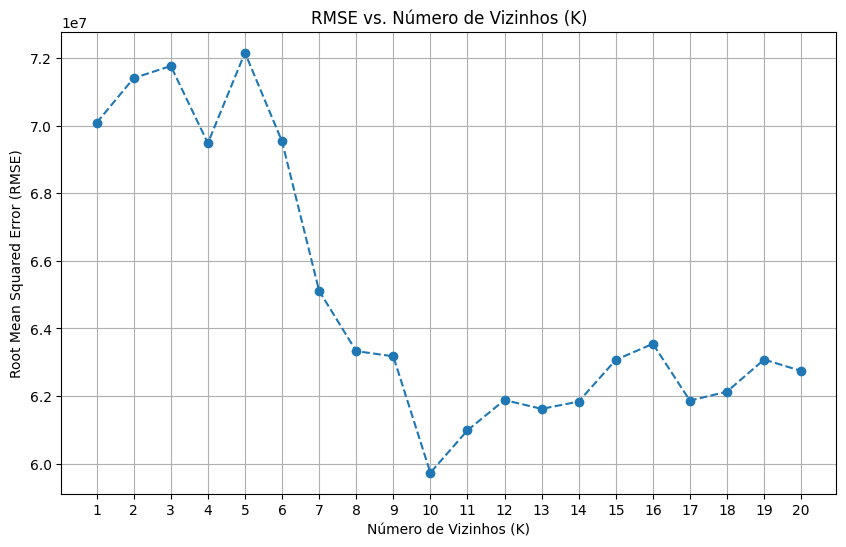

In [ ]:

# 1. Load the data
try:
    df = pd.read_csv('df_knn.csv')
except FileNotFoundError:
    print("O arquivo 'df_knn.csv' n√£o foi encontrado. Por favor, fa√ßa o upload do arquivo.")
    exit()


# 2. Inspect the data
print("Primeiras 5 linhas do DataFrame:")
print(df.head())
print("\nInforma√ß√µes do DataFrame:")
df.info()

# Contagem de valores faltantes na coluna 'Gross'
missing_gross_count = df['Gross'].isnull().sum()
print(f"\nN√∫mero de valores faltantes na coluna 'Gross': {missing_gross_count}")

# 3. Data Preparation

# Separar o DataFrame em dois: um com 'Gross' e outro sem 'Gross'
df_with_gross = df.dropna(subset=['Gross']).copy()
df_to_predict = df[df['Gross'].isnull()].copy()

# Selecionar features para o modelo. Vamos usar apenas colunas num√©ricas que fazem sentido para a predi√ß√£o.
features = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
            'Director_Group', 'Star1_Group', 'Star2_Group', 'Star3_Group', 'Star4_Group']

# Garantir que as features existem no DataFrame
for col in features:
    if col not in df.columns:
        print(f"Erro: A coluna '{col}' n√£o foi encontrada no DataFrame.")
        exit()

# Remover linhas com valores faltantes nas features selecionadas (se houver)
df_with_gross = df_with_gross.dropna(subset=features)
df_to_predict = df_to_predict.dropna(subset=features)


X = df_with_gross[features]
y = df_with_gross['Gross']

# Separar os dados para predi√ß√£o
X_to_predict = df_to_predict[features]


# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar as features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_to_predict_scaled = scaler.transform(X_to_predict)

# 4. Encontrar o K √ìtimo
rmse_values = []
k_range = range(1, 21) # Testar K de 1 a 20

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(error)

# Encontrar o K com o menor erro
optimal_k = k_range[np.argmin(rmse_values)]
min_rmse = min(rmse_values)

print(f"\nO valor √≥timo de K √©: {optimal_k} com um RMSE de {min_rmse:.2f}")

# Plotar o erro vs. K
plt.figure(figsize=(10, 6))
plt.plot(k_range, rmse_values, marker='o', linestyle='--')
plt.title('RMSE vs. N√∫mero de Vizinhos (K)')
plt.xlabel('N√∫mero de Vizinhos (K)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.grid(True)
plt.xticks(k_range)
plt.savefig('rmse_vs_k.png')


# 5. Treinar o modelo final e preencher os valores faltantes

# Treinar com o K √≥timo usando todos os dados dispon√≠veis (com 'Gross')
final_knn = KNeighborsRegressor(n_neighbors=optimal_k)

# Usar o scaler treinado com os dados de treino para transformar o conjunto X completo
X_scaled = scaler.transform(X) # Usando o scaler que j√° foi 'fit' nos dados de treino
final_knn.fit(X_scaled, y)

# Fazer as predi√ß√µes
predicted_gross = final_knn.predict(X_to_predict_scaled)

# 6. Final Output

# Preencher os valores NaN na coluna 'Gross' do DataFrame original
df.loc[df['Gross'].isnull(), 'Gross'] = predicted_gross

# Salvar o novo DataFrame em um arquivo CSV
output_filename = 'df_knn_preenchido.csv'
df.to_csv(output_filename, index=False)

print(f"\nValores faltantes preenchidos e salvos no arquivo: '{output_filename}'")
print("\nVerifica√ß√£o dos valores faltantes ap√≥s o preenchimento:")
print(df.isnull().sum())

An√°lise Inicial: Identifiquei que havia 169 valores faltantes na coluna Gross.

Prepara√ß√£o: Para prever esses valores, utilizei as seguintes colunas como caracter√≠sticas (features): Released_Year, Runtime, IMDB_Rating, Meta_score, No_of_Votes e as colunas de grupo para diretores e estrelas (Director_Group, Star_Group, etc.).

Treinamento e Teste: Separei os dados existentes (80% para treino e 20% para teste) para garantir a qualidade do modelo. O objetivo era encontrar o n√∫mero ideal de "vizinhos" (o par√¢metro K) que gerasse a menor margem de erro.

Encontrando o Melhor "K"
Para encontrar o K ideal, testei valores de 1 a 20 e calculei o erro para cada um. Como voc√™ pode ver no gr√°fico abaixo, o menor erro (RMSE - Root Mean Squared Error) foi alcan√ßado quando o n√∫mero de vizinhos foi K=10.

Resultado Final
Utilizando o modelo KNN com K=10, previ os 169 valores que faltavam na coluna Gross. O conjunto de dados completo, agora sem valores faltantes nessa coluna, foi salvo em um novo arquivo.

In [ ]:
df_gross = pd.read_csv('df_gross.csv')
df_knn = pd.read_csv('df_knn_preenchido.csv')

# Exibe a quantidade de valores ausentes na coluna 'Gross' antes do preenchimento.
print("Valores ausentes em df_gross['Gross'] antes do preenchimento:")
print(df_gross['Gross'].isnull().sum())

# Preenche os valores ausentes (NaN) na coluna 'Gross' do df_gross
# com os valores correspondentes da coluna 'Gross' do df_knn.
# O inplace=True modifica o DataFrame df_gross diretamente.
df_gross['Gross'].fillna(df_knn['Gross'], inplace=True)

# Exibe a quantidade de valores ausentes ap√≥s o preenchimento para confirmar.
print("\nValores ausentes em df_gross['Gross'] ap√≥s o preenchimento:")
print(df_gross['Gross'].isnull().sum())

# Salva o DataFrame df_gross atualizado para um novo arquivo CSV
# chamado 'df_gross_preenchido.csv', sem o √≠ndice do pandas.
df_gross.to_csv('df_gross_preenchido.csv', index=False)

print("\nArquivo 'df_gross_preenchido.csv' criado com sucesso!")

Valores ausentes em df_gross['Gross'] antes do preenchimento:
169

Valores ausentes em df_gross['Gross'] ap√≥s o preenchimento:
1

Arquivo 'df_gross_preenchido.csv' criado com sucesso!


/tmp/ipython-input-2432430471.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_gross['Gross'].fillna(df_knn['Gross'], inplace=True)


In [ ]:
df1=pd.read_csv('df_gross_preenchido.csv')

In [ ]:
print(df1.isnull().sum())

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [ ]:
df1.dropna(subset=['Gross'], inplace=True)
df_gross.to_csv('df_final.csv', index=False)